In [52]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn import metrics
%matplotlib inline

In [250]:
base_train = pd.read_csv('train.csv')
base_test = pd.read_csv('test.csv')
base_answer = pd.read_csv('test.csv')

In [251]:
columns = [    
    'NU_NOTA_CN',
    'NU_NOTA_CH',
    'NU_NOTA_LC',    
    'NU_NOTA_REDACAO',
    'NU_INSCRICAO',
    'NU_NOTA_MT'
]

In [252]:
base_train = base_train[columns] 
base_train.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,NU_INSCRICAO,NU_NOTA_MT
0,436.3,495.4,581.2,520.0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,399.4
1,474.5,544.1,599.0,580.0,2c3acac4b33ec2b195d77e7c04a2d75727fad723,459.8
2,NaN,NaN,NaN,NaN,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,NaN
3,NaN,NaN,NaN,NaN,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,NaN
4,NaN,NaN,NaN,NaN,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,NaN


In [253]:
base_test = base_test[columns[0:4]] 
base_test.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO
0,464.8,443.5,431.8,420.0
1,391.1,491.1,548.0,580.0
2,595.9,622.7,613.6,320.0
3,NaN,NaN,NaN,NaN
4,592.9,492.6,571.4,320.0


In [254]:
base_answer = base_answer[columns[0:5]] 
base_answer.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,NU_INSCRICAO
0,464.8,443.5,431.8,420.0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98
1,391.1,491.1,548.0,580.0,71a95f9f1b91a82c65ad94abbdf9f54e6066f968
2,595.9,622.7,613.6,320.0,b38a03232f43b11c9d0788abaf060f7366053b6d
3,NaN,NaN,NaN,NaN,70b682d9a3636be23f6120fa9d6b164eb3c6002d
4,592.9,492.6,571.4,320.0,715494628a50142ce8cb17191cfe6d0f3cae0934


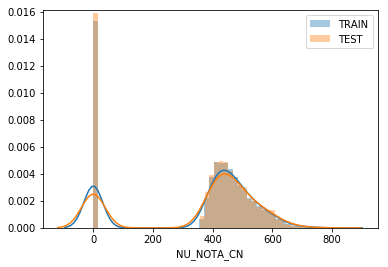

In [159]:
x0 = base_train['NU_NOTA_CN'].fillna(0)
x1 = base_test['NU_NOTA_CN'].fillna(0)

sns.distplot(x0)
sns.distplot(x1)
plt.legend(labels=['TRAIN','TEST']);

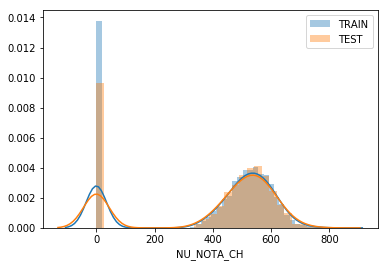

In [160]:
x0 = base_train['NU_NOTA_CH'].fillna(0)
x1 = base_test['NU_NOTA_CH'].fillna(0)

sns.distplot(x0)
sns.distplot(x1)
plt.legend(labels=['TRAIN','TEST']);

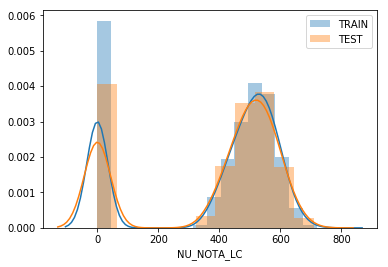

In [161]:
x0 = base_train['NU_NOTA_LC'].fillna(0)
x1 = base_test['NU_NOTA_LC'].fillna(0)

sns.distplot(x0)
sns.distplot(x1)
plt.legend(labels=['TRAIN','TEST']);

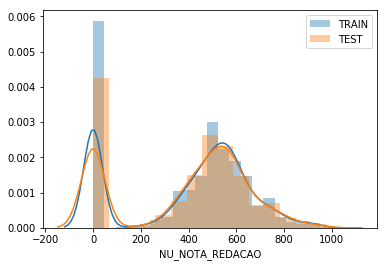

In [162]:
x0 = base_train['NU_NOTA_REDACAO'].fillna(0)
x1 = base_test['NU_NOTA_REDACAO'].fillna(0)

sns.distplot(x0)
sns.distplot(x1)
plt.legend(labels=['TRAIN','TEST']);

In [185]:
base_train.isna().sum()

NU_NOTA_CN         3389
NU_NOTA_CH         3389
NU_NOTA_LC         3597
NU_NOTA_REDACAO    3597
NU_INSCRICAO          0
NU_NOTA_MT         3597
dtype: int64

In [187]:
base_test.isna().sum()

NU_NOTA_CN         1134
NU_NOTA_CH         1134
NU_NOTA_LC         1199
NU_NOTA_REDACAO    1199
dtype: int64

In [189]:
base_answer.isna().sum()

NU_NOTA_CN         1134
NU_NOTA_CH         1134
NU_NOTA_LC         1199
NU_NOTA_REDACAO    1199
NU_INSCRICAO          0
dtype: int64

In [255]:
base_train = base_train.loc[
    (base_train['NU_NOTA_CN'].notna() & base_train['NU_NOTA_CN'] != 0) &
    (base_train['NU_NOTA_CH'].notna() & base_train['NU_NOTA_CH'] != 0) &
    (base_train['NU_NOTA_LC'].notna() & base_train['NU_NOTA_LC'] != 0) &
    (base_train['NU_NOTA_REDACAO'].notna() & base_train['NU_NOTA_REDACAO'] != 0)
]

base_test = base_test.loc[
    (base_test['NU_NOTA_CN'].notna() & base_test['NU_NOTA_CN'] != 0) &
    (base_test['NU_NOTA_CH'].notna() & base_test['NU_NOTA_CH'] != 0) &
    (base_test['NU_NOTA_LC'].notna() & base_test['NU_NOTA_LC'] != 0) &
    (base_test['NU_NOTA_REDACAO'].notna() & base_test['NU_NOTA_REDACAO'] != 0)
]

base_answer = base_answer.loc[
    (base_answer['NU_INSCRICAO'].notna() & base_answer['NU_INSCRICAO'] != 0) &
    (base_answer['NU_NOTA_CN'].notna() & base_answer['NU_NOTA_CN'] != 0) &
    (base_answer['NU_NOTA_CH'].notna() & base_answer['NU_NOTA_CH'] != 0) &
    (base_answer['NU_NOTA_LC'].notna() & base_answer['NU_NOTA_LC'] != 0) &
    (base_answer['NU_NOTA_REDACAO'].notna() & base_answer['NU_NOTA_REDACAO'] != 0)    
]

In [194]:
base_train.isna().sum()

NU_NOTA_CN         0
NU_NOTA_CH         0
NU_NOTA_LC         0
NU_NOTA_REDACAO    0
NU_INSCRICAO       0
NU_NOTA_MT         0
dtype: int64

In [195]:
base_test.isna().sum()

NU_NOTA_CN         0
NU_NOTA_CH         0
NU_NOTA_LC         0
NU_NOTA_REDACAO    0
dtype: int64

In [196]:
base_answer.isna().sum()

NU_NOTA_CN         0
NU_NOTA_CH         0
NU_NOTA_LC         0
NU_NOTA_REDACAO    0
dtype: int64

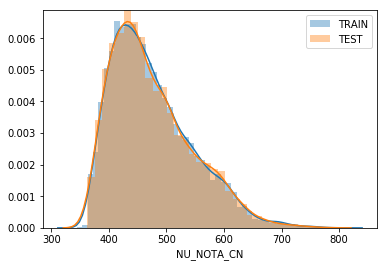

In [16]:
x0 = base_train['NU_NOTA_CN'].fillna(0)
x1 = base_test['NU_NOTA_CN'].fillna(0)

sns.distplot(x0)
sns.distplot(x1)
plt.legend(labels=['TRAIN','TEST']);

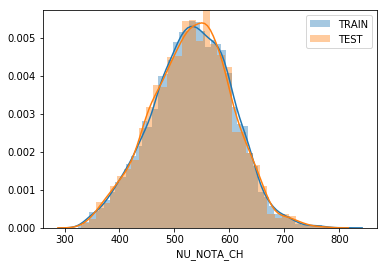

In [17]:
x0 = base_train['NU_NOTA_CH'].fillna(0)
x1 = base_test['NU_NOTA_CH'].fillna(0)

sns.distplot(x0)
sns.distplot(x1)
plt.legend(labels=['TRAIN','TEST']);

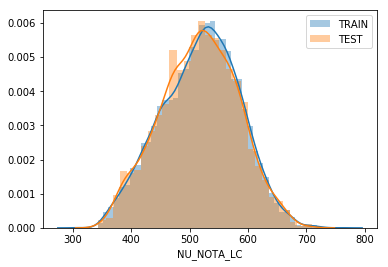

In [18]:
x0 = base_train['NU_NOTA_LC'].fillna(0)
x1 = base_test['NU_NOTA_LC'].fillna(0)

sns.distplot(x0)
sns.distplot(x1)
plt.legend(labels=['TRAIN','TEST']);

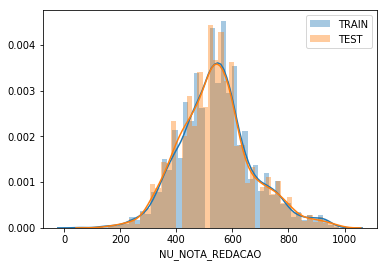

In [19]:
x0 = base_train['NU_NOTA_REDACAO'].fillna(0)
x1 = base_test['NU_NOTA_REDACAO'].fillna(0)

sns.distplot(x0)
sns.distplot(x1)
plt.legend(labels=['TRAIN','TEST']);

In [208]:
y_train = base_train['NU_NOTA_MT']
x_train = base_train[columns[0:4]]
x_test = base_test[columns[0:4]]

In [65]:
sc = StandardScaler()  
x_train = sc.fit_transform(x_train)  
x_test = sc.transform(x_test)

In [66]:
regressor = RandomForestRegressor( 
           criterion='mae', 
           max_depth=8,
           max_leaf_nodes=None,
           min_impurity_split=None,
           min_samples_leaf=1,
           min_samples_split=2,
           min_weight_fraction_leaf=0.0,
           n_estimators= 500,
           n_jobs=-1,
           random_state=0,
           verbose=0,
           warm_start=False
)

In [268]:
regressor.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=8,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [269]:
y_pred_train = regressor.predict(x_train)
y_pred_test = regressor.predict(x_test)

In [275]:
# base_answer = base_answer.drop(columns=columns[0:4])
base_answer['NU_NOTA_MT'] = np.around(y_pred_test, 2)
base_answer['NU_NOTA_MT'].unique()

array([ 417.44,  442.91,  594.8 , ...,  445.52,  463.51,  689.78])

In [276]:
base_answer.to_csv('answer.csv', index=False, header=True)
base_answer


,NU_INSCRICAO,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,417.44
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,442.91
2,b38a03232f43b11c9d0788abaf060f7366053b6d,594.80
4,715494628a50142ce8cb17191cfe6d0f3cae0934,518.38
5,e656d6bad65c93fb2880f1eba5037008c8e75774,466.99
6,465cd2a6907fb37d9d8ad3c065f0e2dabdba9b13,520.37
7,11539e86171bf07d3a36f09377d7f54ebcc8406a,429.59
8,043c544a2104aa8a9849f1a703a08d37a2f16839,481.15
9,76ba050e64ad100b856f0eaabd8f539d5c7dd185,440.45
12,940aede382ccb332fab15d413217695ec44ca765,446.59


In [272]:

print('MAE:', metrics.mean_absolute_error(y_train, y_pred_train).round(8)  )
print('MSE:', metrics.mean_squared_error(y_train, y_pred_train).round(8) )  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)).round(8))

MAE: 53.33325234
MSE: 4705.64008002
RMSE: 68.59766818
